Multiple Linear Regression on Iris dataset
- considering 2 features

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [2]:
iris = datasets.load_iris()

In [3]:
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
data['class'] = iris.target

### Data preprocessing

In [7]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

### Exploratory Data Analysis

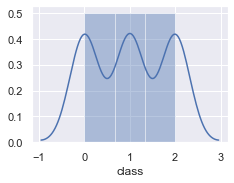

In [8]:
sns.set(rc={'figure.figsize':(3.5,2.5)})
sns.distplot(data['class'], bins=3)
plt.show()

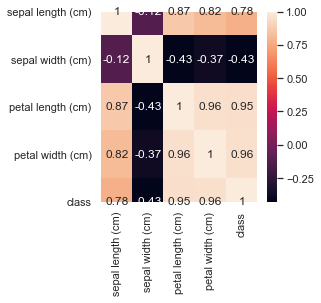

In [9]:
correlation_matrix = data.corr().round(2)
sns.set(rc={'figure.figsize':(3.5,3.5)})
sns.heatmap(data=correlation_matrix, annot=True)

### Observations:

 - Correlation with class - Petal width (0.96) > Petal length (0.95) > Sepal length (0.78) > Sepal width
 - Checking for multi - collinearity :
 - Petal width and Petal length  (0.96)
 - Petal width and Sepal length  (0.82)
 - Petal length and Sepal length (0.87)
 - Thus, I choose Petal width and Sepal length as my features.

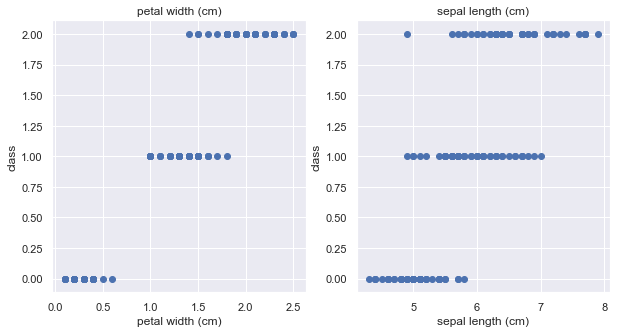

In [10]:
plt.figure(figsize=(10, 5))

features = ['petal width (cm)', 'sepal length (cm)']
target = data['class']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('class')

### Preparing the data for training the model and Splitting the data into training and testing sets

In [11]:
X = pd.DataFrame(np.c_[data['petal width (cm)'], data['sepal length (cm)']], columns = ['petal width (cm)','sepal length (cm)'])
Y = data['class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(120, 2)
(30, 2)
(120,)
(30,)


### Training and testing the model

In [12]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Model evaluation

In [13]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 0.21942045690789255
R2 score is 0.928607470754894


The model performance for testing set
--------------------------------------
RMSE is 0.3076643186331589
R2 score is 0.8481433161069424
